In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
datos = load_iris()
datos.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
datos["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
dataset = pd.DataFrame(data = datos["data"], columns =  datos["feature_names"])
dataset["especie"] = datos["target"]
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Queremos obtener un conjunto de reglas de árbol de decisión para clasificar la especie de flor con las 4 medidas que tenemos

### Separación de datos

In [7]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('especie', axis = 1), dataset['especie'], test_size = 0.3)

In [9]:
# arbol de decision
arbol = treeClassifier.DecisionTreeClassifier()
arbol.fit(x_train, y_train)
# predicción para los datos de prueba
pred_arbol = arbol.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_pred=pred_arbol, y_true=y_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_pred=pred_arbol, y_true=y_test)))

Accuracy_score: 0.9555555555555556
Matriz de confusión:
[[23  0  0]
 [ 0 12  0]
 [ 0  2  8]]


In [10]:
# bosque aleatorio
bosque = forest(1000)
bosque.fit(x_train, y_train)
# predicción para los datos de prueba
pred_bosque = bosque.predict(x_test)
print("Accuracy_score: {}".format(accuracy_score(y_pred=pred_bosque, y_true=y_test)))
print("Matriz de confusión:\n{}".format(confusion_matrix(y_pred=pred_bosque, y_true=y_test)))

Accuracy_score: 0.9555555555555556
Matriz de confusión:
[[23  0  0]
 [ 0 12  0]
 [ 0  2  8]]


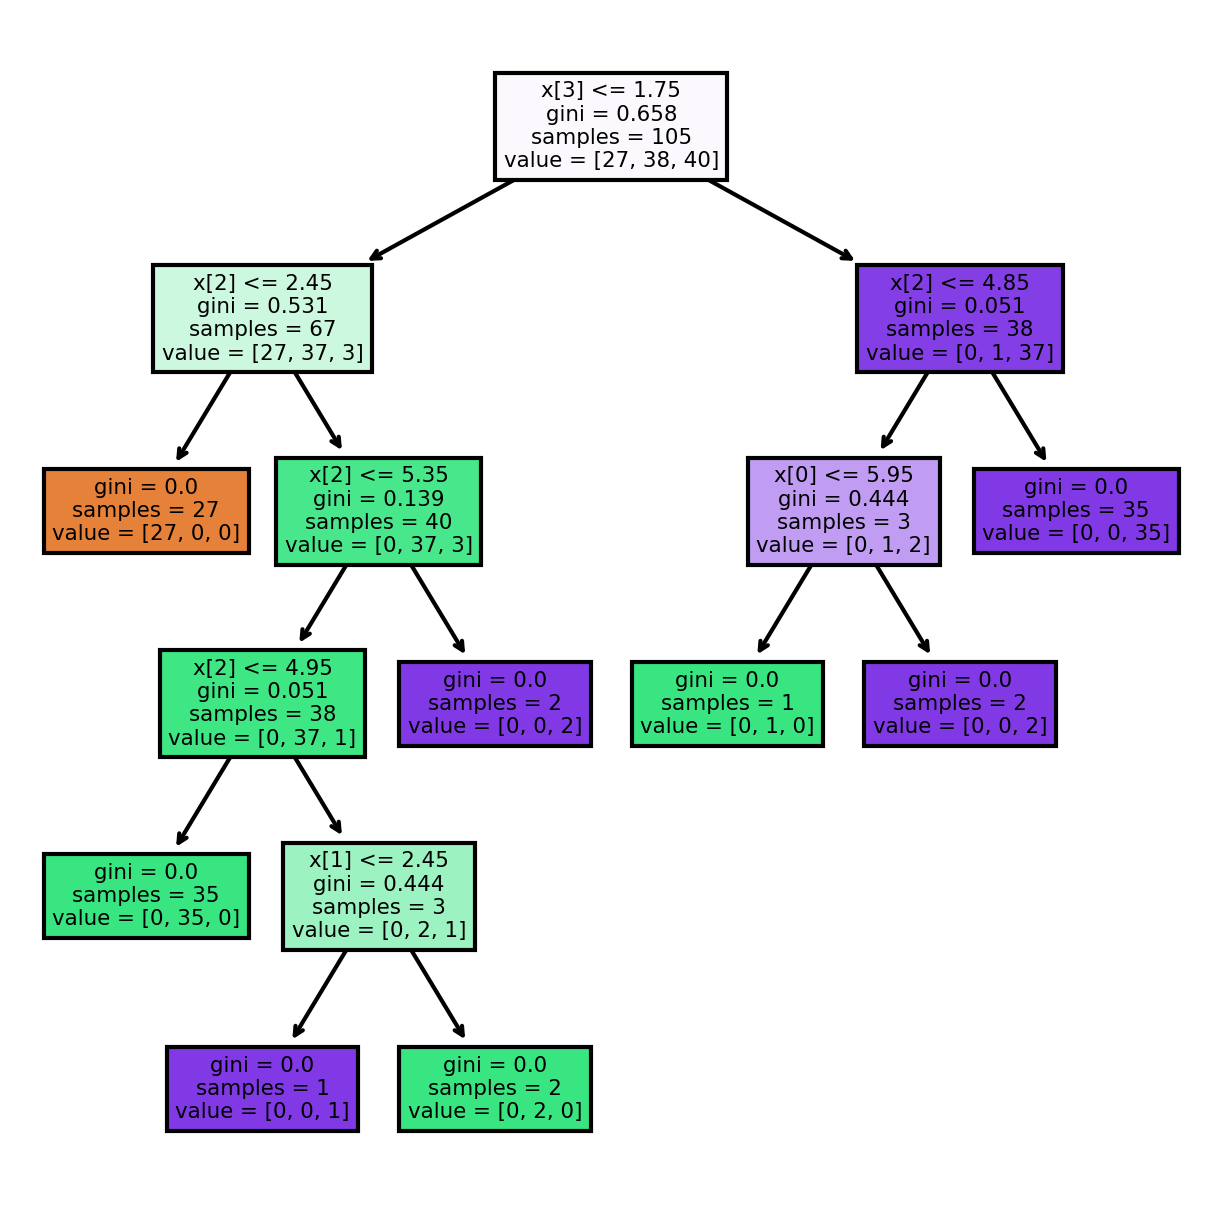

In [11]:
plt.figure(figsize = (5,5), dpi = 300)
treeClassifier.plot_tree(arbol,filled = True);
plt.show()